In [ ]:
from new_nfa import *

# class matchNFA

In [ ]:
class matchNFA(OFA):
	pass

In [172]:
def nfaPosCount(self: RegExp):
	aut = NFA()
	i = aut.addState(1)
	f = aut.addState()

	aut.addInitial(i)

	if self.Sigma is not None:
		aut.setSigma(self.Sigma)

	aut.addTransitionStar(i, i)
	aut.addTransitionStar(f, f)

	lf:dict = self.linearForm() # type: ignore

	def follow_head(head, tail, state=None, initial=i, final=f):
		tail_pop = tail.pop()

		if isinstance(tail_pop, CStar):
			raise Exception("Star operator not allowed in nfaPosCount")
		else:
			nstate = aut.addState()

			if state is None:
				aut.addTransition(initial, head, nstate)
			else:
				aut.addTransition(state, head, nstate)

			if isinstance(tail_pop, CEpsilon):
				aut.addFinal(nstate)
				aut.addTransitionStar(nstate, final)
				return

			new_lf = tail_pop.linearForm()
			for nhead in new_lf:
				follow_head(nhead, new_lf[nhead], nstate)


	for head in lf:
		follow_head(head, lf[head])
	
	return aut

setattr(RegExp, 'nfaPosCount', nfaPosCount)

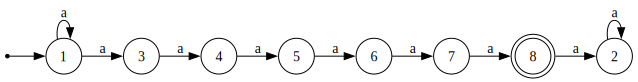

In [178]:
x = str2regexp("(aa+aaa)(aaa+aa)") # aa+aaa
y = x.toNFA(nfa_method="nfaPosCount")
y.display()

# @epsilon {0: (0, 0)}
# a {0: (1, 1), 4: (0, 1)}
# b {0: (2, 2), 2: (1, 2), 5: (0, 2)}
# b {0: (3, 3), 2: (2, 3), 1: (0, 3)}
# a {0: (4, 4), 4: (3, 4), 3: (2, 4), 1: (0, 4)}
# b {0: (5, 5), 2: (4, 5), 5: (3, 5), 1: (0, 5)}
# {5: (3, 5), 3: (2, 4)}

In [ ]:
def table_matcher(aut: NFA, string: str):
	nw : list = [CEpsilon()]
	for c in string:
		nw.append(c)

	lr = {}
	ci = 0
	pos_tab = {}

	for sym in nw:
		if sym == CEpsilon():
			for s in aut.Initial:
				lr[s] = (0,0)
		else:
			nr = {}
			for state in lr:
				if state in aut.delta:
					if sym in aut.delta[state]:
						for end_state in aut.delta[state][sym]:
							nr[end_state] = (lr[state][0] if end_state not in aut.Initial else ci , ci)

							if end_state in aut.Final:
								if end_state in pos_tab:
									pos_tab[end_state].append(nr[end_state])
								else:
									pos_tab[end_state] = [nr[end_state]]
								# pos_tab[end_state] = nr[end_state]
			
			lr = nr

		# print(sym, lr)
		ci+=1

	return (pos_tab)

def enum_matches(pos_tab: dict, string: str):
	for entry in pos_tab:
		for match in pos_tab[entry]:
			print(f"Match for state {entry}: '{string[match[0]:match[1]]}'")

text = "aaaaa"
enum_matches(table_matcher(y, text), text)
